In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST          # Importa il dataset di MNIST (quello dei numeri)

# Importare e settare dataset

Download e creazione di un dataset nella cartella data/ che si trova nella stessa cartella del notebook
questo dataset è quello che si utilizzerà per il training

In [2]:
dataset = MNIST(root = 'data/', download = True)

Creazione di un dataset di testing, bisogna specificare che non verrà usato per il training ponendo train = False

In [3]:
test_dataset = MNIST(root = 'data/', train = False)

In [4]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# %matplotlib inline serve per non far vedere le immagini in una finestra pop up ma direttamente qui sul notebook

Label: 5


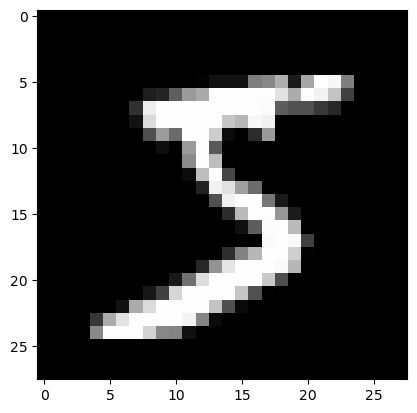

In [6]:
image, label = dataset[0]
plt.imshow(image, cmap = 'gray')      #permette di stampare un dato come immagine, cmap specifica i colori utilizzati
print('Label:', label)

In [7]:
import torchvision.transforms as transforms

Importiamo il dataset e lo trasformiamo in un tensore

In [8]:
dataset = MNIST(root = 'data/', 
                train = True,
                transform = transforms.ToTensor()         # Trasforma l'immagine in un tensore shape: [colore, altezza, lunghezza]
                )

In [9]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

# Risultato: torch.Size(#colori, altezza, lunghezza)

torch.Size([1, 28, 28]) 5


In [10]:
print(img_tensor[0,10:15,10:15])        # prendo il primo layer (0) e i pixel da 10 a 15 in altezza e lunghezzza 
print(torch.max(img_tensor), torch.min(img_tensor))

# I valori sono tra 0 e 1 con 0 che rappresenta il nero e 1 il bianco

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


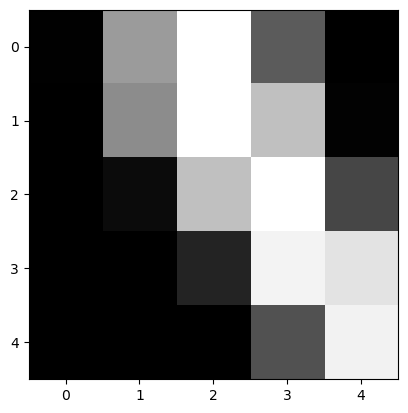

In [11]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

# Training e validazione dataset

Il dataset solitamente viene diviso in 3 parti:

1. Training set: "allenamento" del modello, calcolo della perdita e aggiustamento di pesi e bias
1. Validation set: usato per valutare il modello durante il training, sceglie la migliore versione del modello
1. Test set: usato per comparare diversi modelli e per capire l'accuratezza del modello

In [12]:
from torch.utils.data import random_split

# funzione che permette di dividere un set in maniera random

In [13]:
train_ds, val_ds = random_split(dataset, [50000, 10000])        # divide il set e ne assegna 50000 a train_ds e 10000 a val_ds
len(train_ds), len(val_ds)

(50000, 10000)

In [14]:
from torch.utils.data import DataLoader

# DataLoader permette la creazione di diversi lotti

In [15]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle = True)       # shuffle = True per prendere i dati in maniera casuale
val_loader = DataLoader(val_ds, batch_size)                     # val: validation

# creazione set di training (in lotti di 128) 

# Modello

Usiamo un modello di regressione lineare (come nella lezione 1): pred = x @ w.t() + b

nn.Linear si aspetta di riceve in input un vettore, quindi si dovrà appiattire il tensore a un vettore di dimensione 1 * 28 * 28 = 784

In [16]:
import torch.nn as nn

In [17]:
input_size = 28*28
num_classes = 10

Tramite la libreria torch.nn creiamo un modello di regressione lineare dati un numero di input e un numero di obiettivi (output)

In [18]:
model = nn.Linear(input_size, num_classes)

# Modello regressione lineare

In [19]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0045,  0.0109,  0.0295,  ..., -0.0346,  0.0147,  0.0308],
        [-0.0321,  0.0354, -0.0310,  ...,  0.0202, -0.0155,  0.0206],
        [ 0.0260,  0.0268,  0.0100,  ..., -0.0226, -0.0110, -0.0005],
        ...,
        [ 0.0119, -0.0235,  0.0050,  ..., -0.0286,  0.0273,  0.0041],
        [-0.0331, -0.0338,  0.0053,  ..., -0.0037,  0.0059,  0.0294],
        [-0.0280,  0.0195,  0.0236,  ...,  0.0059, -0.0142, -0.0240]],
       requires_grad=True)

In [20]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0352,  0.0072, -0.0041,  0.0077, -0.0236, -0.0312, -0.0183,  0.0174,
        -0.0290,  0.0284], requires_grad=True)

***

Non si può utilizzare questa forma perché le shape non combaciano

In [21]:
# for images, labels in train_loader:
#    print(labels)
#    print(images)
#    outputs = model(images)
#    print(outputs)
#    break

# se si passano le image al modello si ottiene un errore perché si aspetta un vettore di dimensione 28*28, non un vettore multidimensionale.
# Quindi bisogna rendelrlo un vettore

In [22]:
# images.shape

In [23]:
# images.reshape(128, 784).shape

# modifica la shape per ottenere un tensore [128, 724]

***

**CREAZIONE DI UNA CLASSE**

Esempio di una classe:

In [24]:
#class person:
    # costrutto della classe
#    def __init__(self, name, age):
#        self.name = name
#        self.age = age
    
    # NB! il primo attributo di ogni classe è sempre self che si riferisce a se stesso

    # definizione di metodi della classe
#    def say_hello(self):
#        print("Hello my name is: " + self.name + '!')

In [25]:
class MnistModel(nn.Module):            # nn.Module classe base di ogni rete neurale

    # All'interno di __init__ instaziamo pesi e bias attraverso nn.Linear

    def __init__(self):
        super().__init__()              # superlcasse, classe che include classi al suo interno (nn.Module)
        self.linear = nn.Linear(input_size, num_classes)        #crea un attributo linear in cui definisce un modello lineare con la libreria nn di pytorch 

    # Nel metodo forward(self, xb) quando passiamo un lotto di di input questo viene appiattito e passato a self.linear
    # xb: dimensione di un lotto

    def forward(self, xb):              #funzione che "scorre" i lotti
        xb = xb.reshape(-1, 784)           # xb = numero di lotto
        out = self.linear(xb)
        return out

# -1 dentro al reshape viene usata per non dare una misura a una delle dimensioni così si sistemerà in base all'altra dimensione        

In [26]:
model = MnistModel()        #creazione effettiva del modello attraverso la classe

In [27]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [28]:
print(model.linear.weight.shape, model.linear.bias.shape)

torch.Size([10, 784]) torch.Size([10])


**NB!** model non ha più gli attributi weight e bias che si trovano all'interno dell'attributo .linear

In compenso possiede un metodo .parameters() che restituisce una lista che contiene pesi e bias

In [29]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0226,  0.0106,  0.0185,  ...,  0.0227,  0.0284,  0.0233],
         [ 0.0281,  0.0005,  0.0184,  ..., -0.0024, -0.0063, -0.0176],
         [-0.0309,  0.0017, -0.0183,  ..., -0.0178,  0.0008,  0.0159],
         ...,
         [-0.0207, -0.0046, -0.0287,  ..., -0.0084, -0.0058,  0.0043],
         [-0.0209,  0.0071, -0.0155,  ...,  0.0187,  0.0291, -0.0035],
         [ 0.0028,  0.0023, -0.0141,  ...,  0.0346, -0.0195, -0.0295]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0191, -0.0061,  0.0132,  0.0084, -0.0148,  0.0300,  0.0131, -0.0106,
         -0.0351, -0.0184], requires_grad=True)]

In [30]:
for images, labels in train_loader:
    print('image shape:', images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:10].data)

image shape: torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.1279,  0.1714,  0.2155,  0.1370,  0.0175,  0.0981, -0.2512, -0.1206,
         -0.1311, -0.0988],
        [-0.1724,  0.2358,  0.0367, -0.0986,  0.0650,  0.0328, -0.1653, -0.2858,
         -0.2026, -0.2020],
        [-0.3410, -0.0377,  0.1265,  0.0957, -0.0779,  0.1579, -0.2820, -0.1718,
          0.1114, -0.2575],
        [-0.3967,  0.1944,  0.2833, -0.0820, -0.0538,  0.0369, -0.5050, -0.0554,
          0.1134, -0.3421],
        [-0.0811,  0.2548,  0.0578, -0.1078,  0.0166, -0.1649, -0.3331, -0.4029,
         -0.0510, -0.5495],
        [-0.4202,  0.0632,  0.2333,  0.1820, -0.0555, -0.1070, -0.3868, -0.0291,
         -0.0897, -0.1339],
        [ 0.0068,  0.0776,  0.1094, -0.0378,  0.2193,  0.1667, -0.0942, -0.0737,
         -0.0636, -0.0636],
        [ 0.0278,  0.2168, -0.1446,  0.0220,  0.1127, -0.0766, -0.1932, -0.2860,
         -0.0050, -0.2092],
        [-0.0772,  0.0729, -0

NB! Gli output devono rappresentare delle probabilità (positiva) e la loro somma risultare 1 (100% di possibilità). Per poter ottenere questo risultato possiamo applicare la funzione softmax presente nella libreria torch.nn.Functional

In [31]:
import torch.nn.functional as F

In [32]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim = 1)      # F.softmax(risultato regressione lineare, dim = 1: cerca il valore massimo su una riga) 

print("Sample probabilities:\n", probs[:2].data)        # stampa le probabilità dei primi 2

print("Sum: ", torch.sum(probs[0]).item())      # controllo della probabilità totale della prima immagine

Sample probabilities:
 tensor([[0.0878, 0.1184, 0.1238, 0.1144, 0.1015, 0.1101, 0.0776, 0.0884, 0.0875,
         0.0904],
        [0.0897, 0.1349, 0.1105, 0.0966, 0.1137, 0.1101, 0.0903, 0.0801, 0.0870,
         0.0871]])
Sum:  0.9999998807907104


Una volta stabilite le proprietà si può assumere che il collegamento con il peso maggiore sia quello che predice il nostro modello, quindi bisogna cercare il valore più grande all'interno delle 10 probabilità dell'immagine per capire quale valore ha predetto il modello

*Esempio: [0.0738, 0.0691, 0.1152, 0.0685, 0.0973, 0.0998, 0.0880,* **0.1613**, *0.0999, 0.1272] il valore maggiore è 0.1613, quindi il modello ha predetto che il valore all'interno dell'immagine è il numero 7 ([0, 1, 2, 3, 4, 5, 6,* **7**, *8, 9])*

In [33]:
max_probs, preds = torch.max(probs, dim = 1)
print(preds)
print(max_probs)

tensor([2, 1, 5, 2, 1, 2, 4, 1, 6, 2, 4, 6, 1, 2, 2, 2, 4, 6, 3, 4, 2, 2, 1, 1,
        1, 1, 5, 2, 1, 8, 1, 2, 1, 1, 2, 2, 1, 1, 4, 8, 6, 2, 2, 1, 2, 1, 2, 6,
        2, 4, 2, 4, 4, 2, 4, 5, 5, 2, 2, 2, 2, 4, 4, 2, 3, 6, 1, 1, 3, 2, 1, 1,
        1, 1, 5, 2, 2, 1, 2, 5, 1, 1, 1, 4, 2, 4, 4, 1, 6, 4, 1, 4, 4, 1, 1, 0,
        1, 6, 1, 2, 2, 5, 1, 1, 1, 2, 4, 5, 4, 4, 2, 1, 2, 8, 3, 1, 4, 1, 2, 2,
        2, 1, 1, 2, 1, 2, 2, 2])
tensor([0.1238, 0.1349, 0.1234, 0.1397, 0.1442, 0.1334, 0.1208, 0.1296, 0.1188,
        0.1344, 0.1177, 0.1282, 0.1301, 0.1263, 0.1448, 0.1348, 0.1211, 0.1289,
        0.1215, 0.1255, 0.1283, 0.1500, 0.1303, 0.1333, 0.1598, 0.1273, 0.1241,
        0.1263, 0.1301, 0.1215, 0.1581, 0.1246, 0.1482, 0.1199, 0.1295, 0.1309,
        0.1254, 0.1187, 0.1233, 0.1170, 0.1194, 0.1379, 0.1551, 0.1200, 0.1420,
        0.1276, 0.1164, 0.1340, 0.1422, 0.1174, 0.1515, 0.1446, 0.1375, 0.1174,
        0.1247, 0.1109, 0.1250, 0.1637, 0.1191, 0.1641, 0.1583, 0.1377, 0.1387,
       

Andiamo a controllarli con i risultati effettivi:

In [34]:
labels

tensor([9, 7, 6, 6, 0, 0, 4, 1, 7, 4, 8, 0, 1, 3, 4, 9, 3, 0, 0, 0, 5, 9, 1, 7,
        5, 2, 7, 0, 3, 3, 8, 4, 6, 4, 9, 4, 8, 7, 9, 0, 0, 6, 4, 1, 9, 8, 7, 0,
        8, 2, 5, 8, 8, 3, 3, 1, 7, 4, 2, 6, 6, 3, 9, 2, 0, 0, 4, 9, 0, 4, 1, 5,
        1, 8, 0, 6, 2, 1, 9, 9, 1, 1, 1, 3, 3, 3, 9, 8, 0, 4, 2, 4, 7, 3, 3, 6,
        1, 0, 5, 3, 0, 7, 2, 6, 8, 6, 9, 0, 2, 9, 6, 7, 9, 0, 7, 8, 5, 1, 2, 3,
        3, 0, 2, 0, 5, 9, 9, 3])

# Valutazione misurazione e funzione di perdita

Valutiamo l'accuratezza della prevision attraverso una funzione di accuratezza

In [35]:
print(preds)
print(labels)
print(preds == labels)

tensor([2, 1, 5, 2, 1, 2, 4, 1, 6, 2, 4, 6, 1, 2, 2, 2, 4, 6, 3, 4, 2, 2, 1, 1,
        1, 1, 5, 2, 1, 8, 1, 2, 1, 1, 2, 2, 1, 1, 4, 8, 6, 2, 2, 1, 2, 1, 2, 6,
        2, 4, 2, 4, 4, 2, 4, 5, 5, 2, 2, 2, 2, 4, 4, 2, 3, 6, 1, 1, 3, 2, 1, 1,
        1, 1, 5, 2, 2, 1, 2, 5, 1, 1, 1, 4, 2, 4, 4, 1, 6, 4, 1, 4, 4, 1, 1, 0,
        1, 6, 1, 2, 2, 5, 1, 1, 1, 2, 4, 5, 4, 4, 2, 1, 2, 8, 3, 1, 4, 1, 2, 2,
        2, 1, 1, 2, 1, 2, 2, 2])
tensor([9, 7, 6, 6, 0, 0, 4, 1, 7, 4, 8, 0, 1, 3, 4, 9, 3, 0, 0, 0, 5, 9, 1, 7,
        5, 2, 7, 0, 3, 3, 8, 4, 6, 4, 9, 4, 8, 7, 9, 0, 0, 6, 4, 1, 9, 8, 7, 0,
        8, 2, 5, 8, 8, 3, 3, 1, 7, 4, 2, 6, 6, 3, 9, 2, 0, 0, 4, 9, 0, 4, 1, 5,
        1, 8, 0, 6, 2, 1, 9, 9, 1, 1, 1, 3, 3, 3, 9, 8, 0, 4, 2, 4, 7, 3, 3, 6,
        1, 0, 5, 3, 0, 7, 2, 6, 8, 6, 9, 0, 2, 9, 6, 7, 9, 0, 7, 8, 5, 1, 2, 3,
        3, 0, 2, 0, 5, 9, 9, 3])
tensor([False, False, False, False, False, False,  True,  True, False, False,
        False, False,  True, False, False, False, False,

In [36]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim = 1)      # outputs: risultati della regressione lineare senza applicare il softmax
    # _ (undescore da solo come variabile) restituisce l'ultimo risultato ottenuto dall'ultima espressione eseguita da Python

    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# torch.sum(preds == labels) è un counter, conta ogni volta che si trova un'iterazione vera in cui la
# previsione corrisponde alla sua label

In [37]:
accuracy(outputs, labels)

tensor(0.1484)

**NB!** La funzione di accuratezza serve a noi per capire l'efficienza del modello ma non possiamo usarla come funzione di perdita per migliorare il modello poiché:
1. Non è una funzione differenziabile
1. Non tiene conto delle effettive probabilità

Una funzione di perdita molto utilizzata è la **cross-entropy** 

* Per ogni fila di output viene selezionata la probabilità predetta per la label corretta (es: [0.1, 0.3, 0.2, ...] e la label corretta è il 1 quindi la sua probabilità è di 0.3)
* Quindi si esegue il logaritmo della probabilità selezionata (se la probabilità è alta allora il logaritmo sarà un numero negativo molto piccolo e vicino allo 0 mentre se la probabilità è bassa allora si avrà un numero negativo molto grande)
* Successivamente moltiplicando per -1 si ottiene la perdita di ogni riga
* Infine si fa la media della cross-entropy su tutte le righe di output per trovare la perdità complessivo del lotto

In [38]:
loss_fn = F.cross_entropy

In [39]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3225, grad_fn=<NllLossBackward0>)


# Training del modello

Nella fase lineare bisogna aggiungere una **fase di validazione** per valutare il modello in ogni epoca

In [40]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):     # lr: learning rate?
    optimizer = opt_func(model.parameters(), lr)        # model.parameters() mette pesi e bias all'interno di una list
    history = []            # per salvare il risultato di ogni epoch
    
    # ripetizione per il numero di epochs dato
    for epoch in range(epochs):
        
        # Fase di training (in lotti)
        for batch in train_loader:

            # 1. calcolo perdita
            loss = model.training_step(batch)

            # 2. calcolo derivat
            loss.backward()

            # 3. Aggiornamento parametri usando le derivate
            optimizer.step()

            #4. Reset della derivata a 0
            optimizer.zero_grad()
        
        #  Fase di validazione
        result = evaluate(model, val_loader)            # val_loader: dataLoader di validazione
        model.epoch_end(epoch, result)
        history.append(result)

    return history

# NB! questa parte del codice può essere riutilizzata per ogni problema di deep learning 

In [41]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]        # esegue l'operazione per il numero di batch nel val_loader
    return model.validation_epoch_end(outputs)

In [42]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    # Trasforma il batch in un array monodimensionale ed esegue la regressione lineare su questo
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    # Riceve in input un lotto di dati e restituisce la perdita
    def training_step(self, batch):
        images, labels = batch                      # Estrazione di immagini ed etichette dal lotto
        out = self(images)                          # Generazione previsioni
        loss = F.cross_entropy(out, labels)         # Calcolo perdita
        return loss
    
    # Dato un lotto calcola la perdita e l'accuratezza

    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                              # Generazione previsioni
        loss = F.cross_entropy(out, labels)             # Calculo perdita
        acc = accuracy(out, labels)                     # Calculo accuratezza
        return {'val_loss': loss, 'val_acc': acc}

    # Restituisce la media delle perdite e delle accuratezze di tutto il lotto

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()           # Unione delle perdite
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()              # Unione accuratezze
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    # Stampa i risultati ottenuti da validation_epoch_end

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [43]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3074791431427, 'val_acc': 0.1191653460264206}

In [44]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

# Cos'è learning rate e come sceglierlo?

Epoch [0], val_loss: 1.9381, val_acc: 0.6397
Epoch [1], val_loss: 1.6691, val_acc: 0.7374
Epoch [2], val_loss: 1.4685, val_acc: 0.7706
Epoch [3], val_loss: 1.3172, val_acc: 0.7868
Epoch [4], val_loss: 1.2011, val_acc: 0.8004


In [45]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1101, val_acc: 0.8073
Epoch [1], val_loss: 1.0371, val_acc: 0.8160
Epoch [2], val_loss: 0.9774, val_acc: 0.8225
Epoch [3], val_loss: 0.9278, val_acc: 0.8278
Epoch [4], val_loss: 0.8859, val_acc: 0.8312


In [46]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8500, val_acc: 0.8343
Epoch [1], val_loss: 0.8189, val_acc: 0.8379
Epoch [2], val_loss: 0.7917, val_acc: 0.8412
Epoch [3], val_loss: 0.7677, val_acc: 0.8433
Epoch [4], val_loss: 0.7463, val_acc: 0.8450


In [47]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7272, val_acc: 0.8469
Epoch [1], val_loss: 0.7099, val_acc: 0.8484
Epoch [2], val_loss: 0.6943, val_acc: 0.8498
Epoch [3], val_loss: 0.6800, val_acc: 0.8524
Epoch [4], val_loss: 0.6670, val_acc: 0.8536


Text(0.5, 1.0, 'Accuracy vs # epochs')

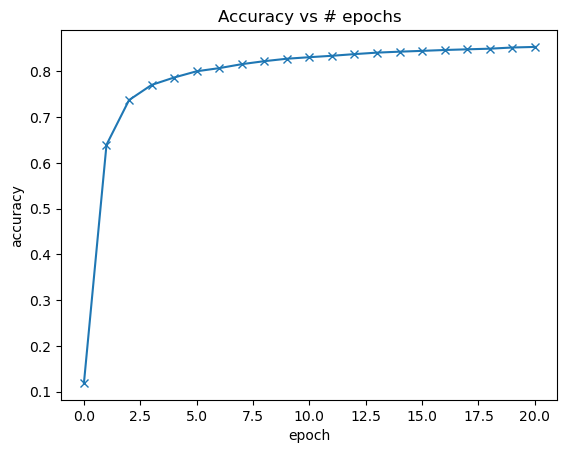

In [48]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]          # cosa fa val_acc?
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs # epochs')

# Testing con singole immagini

In [49]:
# Definizione del dataset di testing

test_dataset = MNIST(root = 'data/',
                     train = False,
                     transform = transforms.ToTensor())

Creiamo una funzione per predirre le immagini, questa ci restituisce la label della singola immagine passata

NB! il modello funziona con lotti di immagini mentre noi stiamo usando una singola immagine, quindi utilizziamo la funzione **.unsqueeze(0)** per aggiungere una dimensione per creare un lotto con una singola immagine: **[1, 28, 28]  --> [1, 1, 28, 28]**

In [50]:
def predict_image(img, model):
    xb = img.unsqueeze(0)                   # Crea un lotto con una singola immagine
    yb = model(xb)
    _, preds = torch.max(yb, dim = 1)
    return preds[0].item()                  # .item() estra il numero dal tensore

Alcune prove:

Label:  7 , Predicted:  7


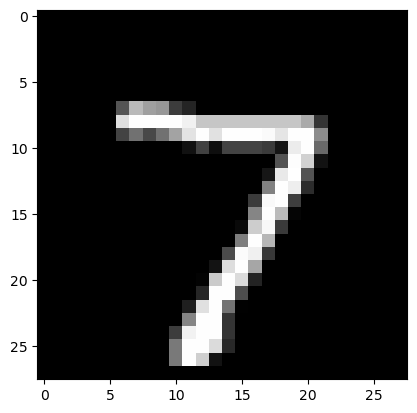

In [51]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print('Label: ', label, ', Predicted: ', predict_image(img, model))

Label:  0 , Predicted:  0


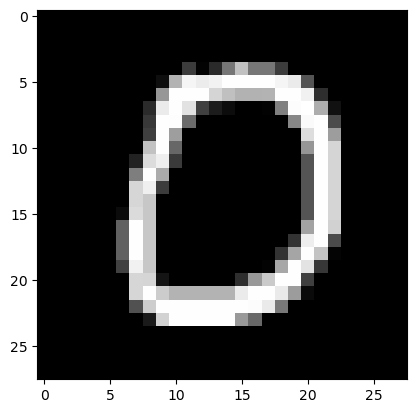

In [52]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap = 'gray')
print('Label: ', label, ', Predicted: ', predict_image(img, model))

Label:  9 , Predicted:  4


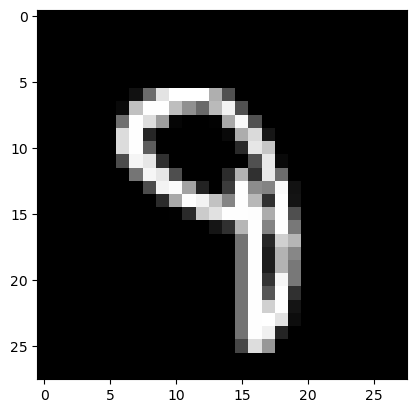

In [53]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap = 'gray')
print('Label: ', label, ', Predicted: ', predict_image(img, model))

Label:  2 , Predicted:  8


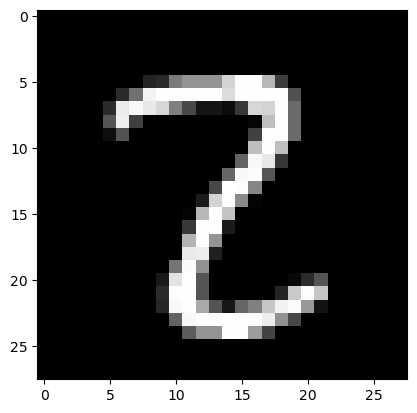

In [54]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap = 'gray')
print('Label: ', label, ', Predicted: ', predict_image(img, model))

NB! Dovremmo avere che accuratezza e perdita del validation set se non dovesse esserlo abbiamo bisogno di un migliore validation set 

In [55]:
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6392480134963989, 'val_acc': 0.86181640625}

# Salvataggio e caricamento del modello

Una volta raggiunto un buon risultato con il modello possiamo salvarlo per utilizzarlo successivamente senza dover rifare il training

In [56]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [57]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0255, -0.0171,  0.0164,  ..., -0.0301,  0.0022,  0.0328],
                      [-0.0342,  0.0288, -0.0247,  ..., -0.0219,  0.0308, -0.0121],
                      [ 0.0071,  0.0290,  0.0249,  ..., -0.0186, -0.0078, -0.0217],
                      ...,
                      [ 0.0092,  0.0255,  0.0025,  ...,  0.0283, -0.0110,  0.0105],
                      [ 0.0123, -0.0258,  0.0214,  ...,  0.0160, -0.0049,  0.0350],
                      [ 0.0222,  0.0074, -0.0192,  ...,  0.0065,  0.0073,  0.0123]])),
             ('linear.bias',
              tensor([-0.0259,  0.1160, -0.0463, -0.0121, -0.0060,  0.0191, -0.0051,  0.0299,
                      -0.1234, -0.0384]))])

Per importare i pesi del modello si può instaziare la classe MnistModel usando il metodo .load_state_dict

In [58]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0255, -0.0171,  0.0164,  ..., -0.0301,  0.0022,  0.0328],
                      [-0.0342,  0.0288, -0.0247,  ..., -0.0219,  0.0308, -0.0121],
                      [ 0.0071,  0.0290,  0.0249,  ..., -0.0186, -0.0078, -0.0217],
                      ...,
                      [ 0.0092,  0.0255,  0.0025,  ...,  0.0283, -0.0110,  0.0105],
                      [ 0.0123, -0.0258,  0.0214,  ...,  0.0160, -0.0049,  0.0350],
                      [ 0.0222,  0.0074, -0.0192,  ...,  0.0065,  0.0073,  0.0123]])),
             ('linear.bias',
              tensor([-0.0259,  0.1160, -0.0463, -0.0121, -0.0060,  0.0191, -0.0051,  0.0299,
                      -0.1234, -0.0384]))])

Per controllare che effettivamente siano stati salvati e importati i dati corretti possiamo fare una valutazione attraverso la funzione evaluate()

In [59]:
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6392480134963989, 'val_acc': 0.86181640625}